In [1]:
import glob

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

DATA_PATH = '../../../data/cosmetics_ecommerce_events'
MERGED_DATA_PATH = f'{DATA_PATH}/merged.csv'
RESULTS_PATH = '../../../results/cosmetics_ecommerce_events/exploratory_users_category_events_div_peaks'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #last_expr

In [2]:
df = pd.read_csv(MERGED_DATA_PATH)

In [3]:
df.columns
df.dtypes
df.describe()
df.info()
df.head(10)

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

product_id   category_id         price       user_id
count  2.069284e+07  2.069284e+07  2.069284e+07  2.069284e+07
mean   5.484297e+06  1.554230e+18  8.534735e+00  5.215527e+08
std    1.305716e+06  1.691038e+17  1.938142e+01  8.744312e+07
min    3.752000e+03  1.487580e+18 -7.937000e+01  4.654960e+05
25%    5.724650e+06  1.487580e+18  2.060000e+00  4.818306e+08
50%    5.810720e+06  1.487580e+18  4.050000e+00  5.531297e+08
75%    5.857864e+06  1.487580e+18  7.060000e+00  5.788573e+08
max    5.932595e+06  2.242903e+18  3.277800e+02  6.220902e+08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       cart     5773203  1487580005134238553   
1  2019-10-01 00:00:03 UTC       cart     5773353  1487580005134238553   
2  2019-10-01 00:00:07 UTC       cart     5881589  2151191071051219817   
3  2019-10-01 00:00:07 UTC       cart     5723490  1487580005134238553   
4  2019-10-01 00:00:15 UTC       cart     5881449  1487580013522845895   
5  2019-10-01 00:00:16 UTC       cart     5857269  1487580005134238553   
6  2019-10-01 00:00:19 UTC       cart     5739055  1487580008246412266   
7  2019-10-01 00:00:24 UTC       cart     5825598  1487580009445982239   
8  2019-10-01 00:00:25 UTC       cart     5698989  1487580006317032337   
9  2019-10-01 00:00:26 UTC       view     5875317  2029082628195353599   

  category_code   brand  price    user_id  \
0           NaN  runail   2.62  463240011   
1           NaN  runail   2.62  463240011   
2           NaN  lovely  13.48  429681830   
3           NaN  runail   2.62  463240011   
4           NaN  lovely   0.56  429681830   
5           NaN  runail   2.62  430174032   
6           NaN  kapous   4.75  377667011   
7           NaN     NaN   0.56  467916806   
8           NaN     NaN   1.27  385985999   
9           NaN     NaN   1.59  474232307   

                           user_session  
0  26dd6e6e-4dac-4778-8d2c-92e149dab885  
1  26dd6e6e-4dac-4778-8d2c-92e149dab885  
2  49e8d843-adf3-428b-a2c3-fe8bc6a307c9  
3  26dd6e6e-4dac-4778-8d2c-92e149dab885  
4  49e8d843-adf3-428b-a2c3-fe8bc6a307c9  
5  73dea1e7-664e-43f4-8b30-d32b9d5af04f  
6  81326ac6-daa4-4f0a-b488-fd0956a78733  
7  2f5b5546-b8cb-9ee7-7ecd-84276f8ef486  
8  d30965e8-1101-44ab-b45d-cc1bb9fae694  
9  445f2b74-5e4c-427e-b7fa-6e0a28b156fe

In [4]:
df.shape

user_events = df[['user_id', 'user_session', 'event_time', 'product_id', 'event_type', 'price', 'category_id', 'brand']]

user_events = user_events[user_events['event_type'] == 'cart']

user_events.shape

(20692840, 9)

(5768333, 8)

In [5]:
# events counts
events_count_per_user = user_events.groupby(['user_id'])['event_type'].count()
events_count_per_user.shape

user_stats = events_count_per_user.to_frame().rename(columns={'event_type': 'events_count'})

user_stats['log10_events_count'] = np.log10(user_stats['events_count'])

(398308,)

In [6]:
# compute diversity

user_category_stat = user_events.groupby(['user_id'])['category_id'].agg(['nunique', 'count'])
user_category_stat['category_diversity'] = user_category_stat['nunique'] / user_category_stat['count']
user_category_stat = user_category_stat.rename(columns={'nunique': 'category_nunique', 'count': 'category_count'})
user_category_stat = user_category_stat.drop(columns=['category_count'])
user_category_stat.shape

user_stats = user_stats.merge(user_category_stat, how='inner', left_index=True, right_index=True)
user_stats.shape

user_stats[~user_stats['category_diversity'].isna()]

(398308, 2)

(398308, 4)

events_count  log10_events_count  category_nunique  \
user_id                                                         
2963072               7            0.845098                 2   
4103071               1            0.000000                 1   
4661182               2            0.301030                 1   
5493470               5            0.698970                 1   
6217356               2            0.301030                 1   
...                 ...                 ...               ...   
622084170             1            0.000000                 1   
622084975             9            0.954243                 6   
622086066             1            0.000000                 1   
622089692             1            0.000000                 1   
622090043             1            0.000000                 1   

           category_diversity  
user_id                        
2963072              0.285714  
4103071              1.000000  
4661182              0.500000  
5493470              0.200000  
6217356              0.500000  
...                       ...  
622084170            1.000000  
622084975            0.666667  
622086066            1.000000  
622089692            1.000000  
622090043            1.000000  

[398308 rows x 4 columns]

In [7]:
# compute inner user category diversity

user_category_stat = user_events.groupby(['user_id', 'category_id'])['category_id'].agg(['count'])
user_category_stat = user_category_stat.reset_index(level='category_id')

user_stats_comp = user_stats.merge(user_category_stat, how='inner', left_index=True, right_index=True)
user_stats_comp['user_category_rel_square'] = np.square(user_stats_comp['count'] / user_stats_comp['events_count'])

user_stats_comp.shape

inner_category_diversity = 1 - user_stats_comp.groupby(['user_id'])['user_category_rel_square'].sum()
inner_category_diversity = inner_category_diversity.to_frame().rename(columns={'user_category_rel_square': 'inner_category_diversity'})

user_stats = user_stats.merge(inner_category_diversity, how='inner', left_index=True, right_index=True)
user_stats.shape
user_stats
# user_stats[~user_stats['category_diversity'].isna()]


(1774344, 7)

(398308, 5)

events_count  log10_events_count  category_nunique  \
user_id                                                         
2963072               7            0.845098                 2   
4103071               1            0.000000                 1   
4661182               2            0.301030                 1   
5493470               5            0.698970                 1   
6217356               2            0.301030                 1   
...                 ...                 ...               ...   
622084170             1            0.000000                 1   
622084975             9            0.954243                 6   
622086066             1            0.000000                 1   
622089692             1            0.000000                 1   
622090043             1            0.000000                 1   

           category_diversity  inner_category_diversity  
user_id                                                  
2963072              0.285714                  0.244898  
4103071              1.000000                  0.000000  
4661182              0.500000                  0.000000  
5493470              0.200000                  0.000000  
6217356              0.500000                  0.000000  
...                       ...                       ...  
622084170            1.000000                  0.000000  
622084975            0.666667                  0.790123  
622086066            1.000000                  0.000000  
622089692            1.000000                  0.000000  
622090043            1.000000                  0.000000  

[398308 rows x 5 columns]

In [8]:
from IPython.core.interactiveshell import InteractiveShell
current_ast_node_interactivity = InteractiveShell.ast_node_interactivity
InteractiveShell.ast_node_interactivity = "last_expr"

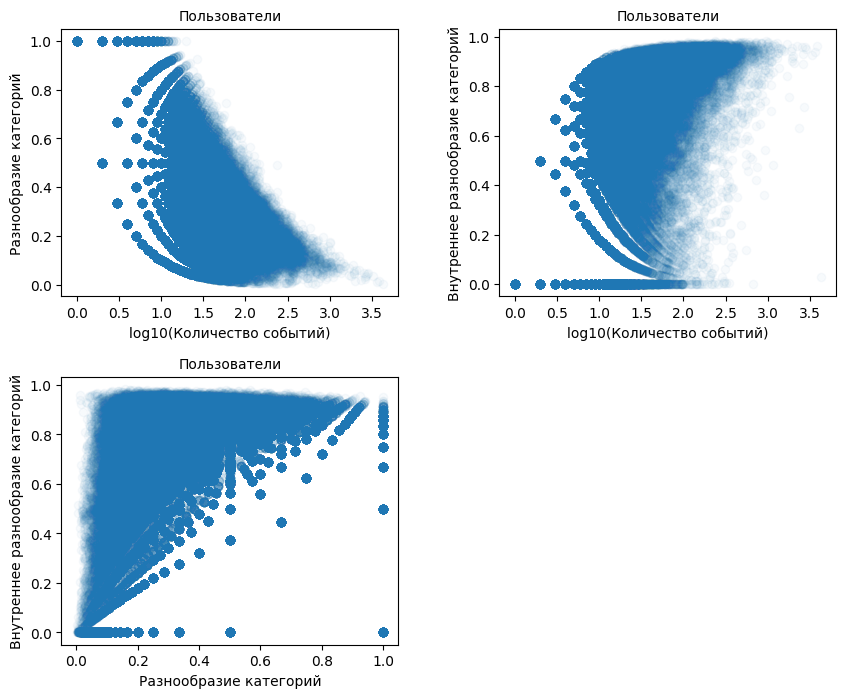

In [10]:
fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.subplot(221)
plt.xlabel('log10(Количество событий)')
plt.ylabel('Разнообразие категорий')
plt.title('Пользователи', size=10)
plt.scatter(user_stats['log10_events_count'], user_stats['category_diversity'], alpha=0.03)

plt.subplot(222)
plt.xlabel('log10(Количество событий)')
plt.ylabel('Внутреннее разнообразие категорий')
plt.title('Пользователи', size=10)
plt.scatter(user_stats['log10_events_count'], user_stats['inner_category_diversity'], alpha=0.03)

plt.subplot(223)
plt.xlabel('Разнообразие категорий')
plt.ylabel('Внутреннее разнообразие категорий')
plt.title('Пользователи', size=10)
plt.scatter(user_stats['category_diversity'], user_stats['inner_category_diversity'], alpha=0.03)

plt.savefig(f'{RESULTS_PATH}/users_statistics.png', dpi=300)

In [11]:
InteractiveShell.ast_node_interactivity = current_ast_node_interactivity

In [12]:
# можно ли найти пользователя с большим числом событий и низким разнообразием

predicate = (user_stats['category_diversity'] < 0.1)\
  & (user_stats['events_count'] > 100)\
  & (user_stats['inner_category_diversity'] > 0.5)\
  & (user_stats['inner_category_diversity'] < 0.6)
len(user_stats[predicate])

selected = user_stats[predicate]

pd.set_option('display.max_rows', len(selected))
selected
pd.reset_option('display.max_rows')


119

events_count  log10_events_count  category_nunique  \
user_id                                                         
10280338            212            2.326336                19   
199598006           302            2.480007                22   
263366743           376            2.575188                18   
296666914           126            2.100371                 7   
321298686           166            2.220108                15   
338137239           209            2.320146                20   
357635418           308            2.488551                25   
363078183           116            2.064458                11   
376178415           171            2.232996                10   
382221933           221            2.344392                19   
401820170           164            2.214844                16   
404991166           174            2.240549                 8   
424670437           296            2.471292                24   
427615672           139            2.143015                 4   
432998582           130            2.113943                11   
433401909           175            2.243038                16   
437836184           396            2.597695                 8   
439332773           165            2.217484                15   
449952475           128            2.107210                 6   
450012494           101            2.004321                 6   
459973546           606            2.782473                36   
460680065           650            2.812913                20   
463697132           172            2.235528                12   
465151898           557            2.745855                42   
469081161           219            2.340444                19   
470357951           175            2.243038                13   
472746947           242            2.383815                16   
475152986           139            2.143015                13   
476268259           158            2.198657                11   
476320851           132            2.120574                 9   
476456956           136            2.133539                12   
482656419           131            2.117271                13   
486409891           130            2.113943                 5   
493064514           152            2.181844                14   
495473583           193            2.285557                 4   
496565916           121            2.082785                 9   
500966576           101            2.004321                 8   
506902612           356            2.551450                10   
509266424           106            2.025306                 9   
511149216           103            2.012837                 5   
514656993           103            2.012837                 7   
516738250           268            2.428135                21   
518278060           221            2.344392                14   
524371244           229            2.359835                19   
525759581           342            2.534026                30   
526156621           121            2.082785                 7   
526462340           198            2.296665                18   
527958204           330            2.518514                 8   
529161267           305            2.484300                22   
534198563           117            2.068186                 9   
535697802           381            2.580925                22   
536544351           116            2.064458                 6   
538580192           298            2.474216                20   
541380262           101            2.004321                 8   
541776655           253            2.403121                18   
542689494           118            2.071882                 4   
543839991           166            2.220108                13   
544842357           141            2.149219                 9   
545815856           231            2.363612                11   
548832417           112            2.049218   

In [15]:
from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks


def compute_log_density_and_peaks(selected_user_events, for_better_vis=False, bandwidth=None):

    np.random.seed(1)
    
    selected_user_events['event_time'] = pd.to_datetime(selected_user_events['event_time'])
    
    selected_user_events = selected_user_events.sort_values(by=['event_time'], kind='mergesort')

    selected_user_events['time_delta'] = selected_user_events['event_time'] - selected_user_events.iloc[0]['event_time']
    selected_user_events['time_delta_sec'] = selected_user_events['time_delta'].apply(lambda x: x.total_seconds())

    x = selected_user_events[['time_delta_sec']]
    
    #print(x['time_delta_sec'].max())

    if for_better_vis:
        bwdth = x['time_delta_sec'].max() / 200 # used for better presentation
    else:
        if not bandwidth:
            bwdth = 3600 # use to find peaks
        else:
            bwdth = None
    
    x = x + 2 * bwdth
    #print(f'bandwidth: {bwdth}')

    kde = KernelDensity(kernel='gaussian', bandwidth=bwdth).fit(x)

    # 0 to max(x['time_delta_sec']) + bwdth to end not with max ((to get smooth ending))
    space = np.linspace(0, max(x['time_delta_sec']) + 2 * bwdth, 1000).reshape(-1, 1)
    log_density = kde.score_samples(space)
    
    peaks = find_peaks(np.exp(log_density))
    return log_density, kde, space, peaks, space[peaks[0]]


In [16]:
selected_users_events = user_events[user_events['user_id'].isin(selected.index)]
selected_users_events.shape

grouped_users_events = selected_users_events.groupby('user_id')
selected_users_stats = selected.assign(peaks_count = np.nan)
for name, group in grouped_users_events:
    _, _, _, peaks_nums, peaks = compute_log_density_and_peaks(group)
    selected_users_stats.at[name, 'peaks_count'] = len(peaks)

(25340, 8)

In [17]:
from IPython.core.interactiveshell import InteractiveShell
current_ast_node_interactivity = InteractiveShell.ast_node_interactivity
InteractiveShell.ast_node_interactivity = "last_expr"

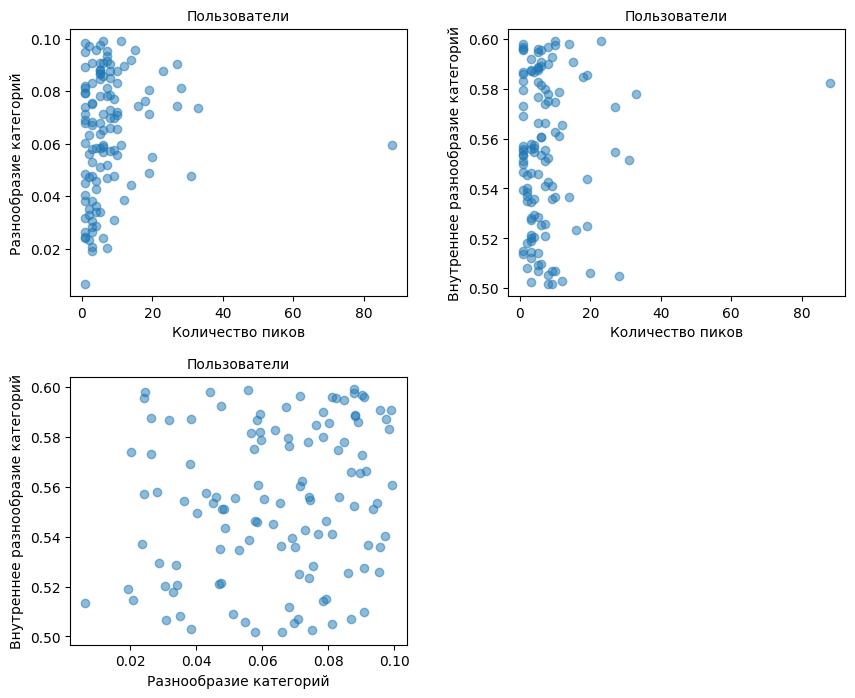

In [18]:
fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.subplot(221)
plt.xlabel('Количество пиков')
plt.ylabel('Разнообразие категорий')
plt.title('Пользователи', size=10)
plt.scatter(selected_users_stats['peaks_count'], selected_users_stats['category_diversity'], alpha=0.5)

plt.subplot(222)
plt.xlabel('Количество пиков')
plt.ylabel('Внутреннее разнообразие категорий')
plt.title('Пользователи', size=10)
plt.scatter(selected_users_stats['peaks_count'], selected_users_stats['inner_category_diversity'], alpha=0.5)

plt.subplot(223)
plt.xlabel('Разнообразие категорий')
plt.ylabel('Внутреннее разнообразие категорий')
plt.title('Пользователи', size=10)
plt.scatter(selected_users_stats['category_diversity'], selected_users_stats['inner_category_diversity'], alpha=0.5)

plt.savefig(f'{RESULTS_PATH}/users_peaks_statistics.png', dpi=300)

In [19]:
InteractiveShell.ast_node_interactivity = current_ast_node_interactivity

In [20]:
predicate = (selected_users_stats['peaks_count'] > 15)
len(selected_users_stats[predicate])

selected = selected_users_stats[predicate]

pd.set_option('display.max_rows', len(selected))
selected
pd.reset_option('display.max_rows')

13

events_count  log10_events_count  category_nunique  \
user_id                                                         
263366743           376            2.575188                18   
424670437           296            2.471292                24   
459973546           606            2.782473                36   
470357951           175            2.243038                13   
496565916           121            2.082785                 9   
525759581           342            2.534026                30   
541776655           253            2.403121                18   
548832417           112            2.049218                 9   
564970238           118            2.071882                 9   
566414478           407            2.609594                30   
568999368           487            2.687529                44   
569680380           237            2.374748                13   
584289031           924            2.965672                45   

           category_diversity  inner_category_diversity  peaks_count  
user_id                                                               
263366743            0.047872                  0.551211         31.0  
424670437            0.081081                  0.505090         28.0  
459973546            0.059406                  0.582062         88.0  
470357951            0.074286                  0.523233         16.0  
496565916            0.074380                  0.554607         27.0  
525759581            0.087719                  0.599142         23.0  
541776655            0.071146                  0.525020         19.0  
548832417            0.080357                  0.585459         19.0  
564970238            0.076271                  0.584602         18.0  
566414478            0.073710                  0.578017         33.0  
568999368            0.090349                  0.572739         27.0  
569680380            0.054852                  0.505973         20.0  
584289031            0.048701                  0.543583         19.0

In [22]:
user_id = 263366743 

In [23]:
np.random.seed(1)

selected_user_events = user_events[user_events['user_id'] == user_id]

selected_user_events.shape

selected_user_events['event_time'] = pd.to_datetime(selected_user_events['event_time'])

selected_user_events = selected_user_events.sort_values(by=['event_time'], kind='mergesort')

selected_user_events['time_delta'] = selected_user_events['event_time'] - selected_user_events.iloc[0]['event_time']
selected_user_events['time_delta_sec'] = selected_user_events['time_delta'].apply(lambda x: x.total_seconds())

pd.set_option('display.max_rows', len(selected_user_events))
selected_user_events
pd.reset_option('display.max_rows')

(376, 8)

/home/Valentin/mldev-recommender-systems-experiment/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


user_id                          user_session  \
139383    263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
208519    263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
347748    263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
347751    263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
347752    263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
347753    263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
1997671   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
1997767   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
1997949   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
1998107   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
1998138   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
1998185   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
1998612   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
1998655   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
1998693   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
1998725   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
2079714   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
2324966   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
2325287   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
2325957   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
2505507   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
2506338   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3338272   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3338357   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3338468   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3338475   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3338519   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3338538   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3338554   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3338647   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3338786   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3338834   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3338862   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3339012   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3339018   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3339083   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3339317   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3451562   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3451612   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3451650   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3451755   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452256   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452260   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452264   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452289   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452378   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452402   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452408   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452414   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452437   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452450   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452459   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452467   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452503   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452526   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452540   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452545   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452547   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452578   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452588   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452591   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3452605   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3453130   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3453280   263366743  cdc83adc-c9f0-454b-8ccb-fd3a16b5e9a8   
3464020   263366743  cdc83adc-c9f0-454b-8ccb-fd

In [24]:
from IPython.core.interactiveshell import InteractiveShell
current_ast_node_interactivity = InteractiveShell.ast_node_interactivity
InteractiveShell.ast_node_interactivity = "last_expr"

/home/Valentin/mldev-recommender-systems-experiment/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


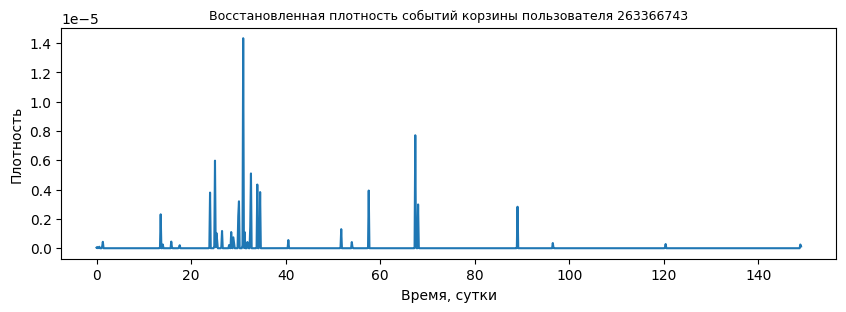

In [25]:
user_id = 263366743 

def plot_user_density(user_id, savefig=False, suffix=None):
    selected_user_events = user_events[user_events['user_id'] == user_id]

    log_density, kde, space, peaks_nums, peaks = compute_log_density_and_peaks(selected_user_events)

    plt.figure(figsize=(10,3))
    plt.plot(space / (3600 * 24), np.exp(log_density))
    plt.xlabel('Время, сутки')
    plt.ylabel('Плотность')
    plt.title(f'Восстановленная плотность событий корзины пользователя {user_id}', size=9)

    peaks
    len(peaks)
    
    if savefig:
        if suffix:
            plt.savefig(f'{RESULTS_PATH}/{suffix}/user_{user_id}_density.png', dpi=300)
        else:
            plt.savefig(f'{RESULTS_PATH}/user_{user_id}_density.png', dpi=300)        
    plt.close(fig)
        
plot_user_density(user_id, True)

plt.ion()


In [29]:
plt.ioff()

user_ids = [263366743, 424670437, 459973546, 470357951, 496565916, 525759581, 541776655, 566414478, 569680380]

for user_id in user_ids:
    plot_user_density(user_id, True)

plt.close('all')
plt.ion()

/home/Valentin/mldev-recommender-systems-experiment/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/home/Valentin/mldev-recommender-systems-experiment/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/home/Valentin/mldev-recommender-systems-experiment/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is 

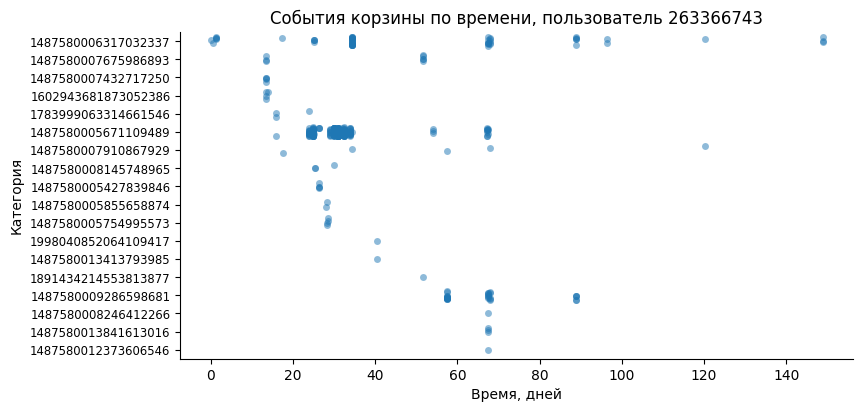

In [26]:
user_id = 263366743

def plot_user_events(user_id, savefig=False, suffix=None):
    one_user_events = user_events[user_events['user_id'] == user_id]
    one_user_events = one_user_events[['event_time', 'category_id']]
    one_user_events['event_time'] = pd.to_datetime(one_user_events['event_time'])

    one_user_events['time_delta'] = one_user_events['event_time'] - one_user_events.iloc[0]['event_time']
    one_user_events['time_delta_sec'] = one_user_events['time_delta'].apply(lambda x: x.total_seconds())
    one_user_events['time_delta_hrs'] = one_user_events['time_delta'].apply(lambda x: x.total_seconds()/(60 * 60))
    one_user_events['time_delta_days'] = one_user_events['time_delta_hrs'].apply(lambda x: x / 24)
    one_user_events['category_id_str'] = one_user_events['category_id'].apply(lambda x: str(x))

    fig = plt.figure(figsize=(10,3))
    ax = sns.catplot(data=one_user_events, x="time_delta_days", y="category_id_str", jitter=0.25, height=4, aspect=9/4)
    plt.setp(ax.ax.collections, alpha=.5)
    ax.ax.set_title(f'События корзины по времени, пользователь {user_id}')
    ax.ax.set_xlabel('Время, дней')
    ax.ax.tick_params(axis='y', which='major', labelsize='small')
    ax.ax.set_ylabel('Категория')

    if savefig:
        if suffix:
            plt.savefig(f'{RESULTS_PATH}/{suffix}/user_{user_id}_category_events.png', dpi=300)
        else:
            plt.savefig(f'{RESULTS_PATH}/user_{user_id}_category_events.png', dpi=300)        
    plt.close(fig)
        
plot_user_events(user_id, True)

plt.ion()

In [28]:
plt.ioff()

user_ids = [263366743, 424670437, 459973546, 470357951, 496565916, 525759581, 541776655, 566414478, 569680380]

for user_id in user_ids:
    plot_user_events(user_id, True)

plt.close('all')
plt.ion()

In [ ]:
InteractiveShell.ast_node_interactivity = current_ast_node_interactivity